# Machine Learning Assignment 4
### Lamya Daakir                          
ldaakir3                           
GTID# : 903529703                 
CS 7641

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import gym
import math
import hiive.mdptoolbox.mdp as mdp

# Frozen Lake

## 4x4

In [2]:
env = gym.make("FrozenLake-v0").env
env.render()


SFFF
FHFH
FFFH
HFFG


In [3]:
number_of_states = env.observation_space.n
number_of_actions = env.action_space.n
print( "States = ", number_of_states)
print( "Actions = ", number_of_actions)

States =  16
Actions =  4


#### https://github.com/llSourcell/AI_for_video_games_demo/blob/master/value_iteration.py

In [4]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import time
import random
import seaborn as sns

In [5]:
def run_episode(env, policy_temp, gamma, render = False):
    """
    Evaluates policy by using it to run an episode and finding its total reward.
    env: gym environment.
    policy: the policy to be used.
    gamma: discount factor.
    render: boolean to turn rendering on/off.
    returns: total reward: real value of the total reward recieved by agent under policy.
    """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done, _ = env.step(int(policy_temp[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

def evaluate_policy(env, policy, gamma,  n = 100):
    """ Evaluates a policy by running it n times.
    returns:
    average total reward
    """
    scores = [run_episode(env, policy, gamma = gamma, render = False) for _ in range(n)]
    return np.mean(scores)

def extract_policy(v, gamma):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.P[s][a]:
                # next_sr is a tuple of (probability, next state, reward, done)
                p, s_, r, _ = next_sr
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    return policy

def plot_graph(x_values, y_values, xlabel, ylabel, title):
    plt.figure()
    plt.title(title)
    plt.plot(x_values, y_values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return


### 1.1 Value Iteration

In [6]:
def value_iteration(env, gamma ):
    """ Value-iteration algorithm """
    v = np.zeros(env.nS)  # initialize value-function
    max_iterations = 100000
    eps = 1e-20
    iteration=0
    for i in range(max_iterations):
        prev_v = np.copy(v)
        for s in range(env.nS):
#             Add gamma here:
            q_sa = [sum([p*(r + gamma * prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)] 
            v[s] = max(q_sa)
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            print ('Value-iteration converged at iteration %d.' %(i+1))
            iteration=i+1
            break
    return v,iteration

Value-iteration converged at iteration 2.
Value-iteration converged at iteration 20.
Value-iteration converged at iteration 28.
Value-iteration converged at iteration 36.
Value-iteration converged at iteration 47.
Value-iteration converged at iteration 57.
Value-iteration converged at iteration 72.
Value-iteration converged at iteration 97.
Value-iteration converged at iteration 148.
Value-iteration converged at iteration 267.


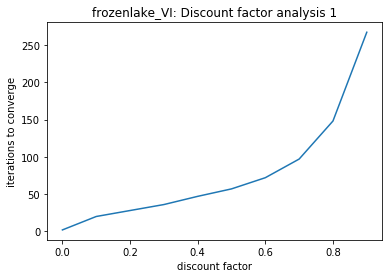

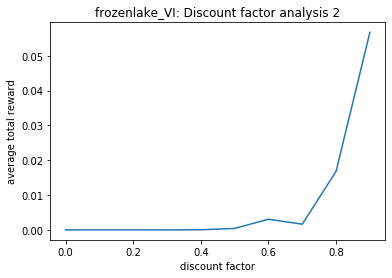

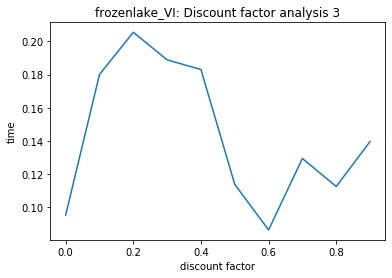

Value-iteration converged at iteration 996.
Time to converge 0.48392534255981445
optimal policy [0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


In [7]:
param_range = np.arange(0, 1, 0.1)
iter_list = []
rewards_list_VI = []
time_list_VI = []

for i in param_range:
    t1 = time.time()
    optimal_v, iter_to_converge = value_iteration(env, gamma=i)
    policy = extract_policy(optimal_v, gamma=i)
    rewards = evaluate_policy(env, policy, gamma=i, n=100)
    t2 = time.time()
    iter_list.append(iter_to_converge)
    rewards_list_VI.append(rewards)
    time_list_VI.append(t2-t1)

plot_graph(param_range, iter_list, 'discount factor', 'iterations to converge',
           'frozenlake_VI: Discount factor analysis 1')
plot_graph(param_range, rewards_list_VI, 'discount factor', 'average total reward',
           'frozenlake_VI: Discount factor analysis 2')
plot_graph(param_range, time_list_VI, 'discount factor', 'time',
           'frozenlake_VI: Discount factor analysis 3')


t1 = time.time()
optimal_v, iter_to_converge = value_iteration(env, gamma=0.99)
policy = extract_policy(optimal_v, gamma=0.99)
rewards = evaluate_policy(env, policy, gamma=0.99, n=100)
t2 = time.time()
temps=t2-t1
print('Time to converge',temps)
print('optimal policy', policy)


### 1.2 Policy Iteration

In [8]:
def policy_iteration(env, gamma):
    """
    Policy-Iteration algorithm
    env : gym environment
    gamma : discount factor
    return : optimal policy, no of iterations to converge
     """
    policy = np.random.choice(env.nA, size=env.nS)  # initialize a random policy
    max_iterations = 100000
    gamma = gamma
    iter = 0

    for i in range(max_iterations):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(old_policy_v, gamma)
        if np.all(policy == new_policy):
            print('Policy-Iteration converged at step %d.' %(i+1))
            iter = i+1
            break
        policy = new_policy
    return policy, iter


def compute_policy_v(env, policy, gamma):
    """
    Iteratively evaluate the value-function under policy.
    Alternatively, we could formulate a set of linear equations in items of v[s]
    and solve them to find the value function.
    env : gym environment
    policy : random policy
    gamma : discount factor
    return : value
    """
    v = np.zeros(env.nS)
    eps = 1e-20
    while True:
        prev_v = np.copy(v)
        for s in range(env.nS):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, _ in env.P[s][policy_a]])
        if np.sum(np.fabs(prev_v - v)) <= eps:
            # value converged
            break
    return v

Policy-Iteration converged at step 2.
Policy-Iteration converged at step 4.
Policy-Iteration converged at step 5.
Policy-Iteration converged at step 4.
Policy-Iteration converged at step 3.
Policy-Iteration converged at step 3.
Policy-Iteration converged at step 4.
Policy-Iteration converged at step 4.
Policy-Iteration converged at step 5.
Policy-Iteration converged at step 5.


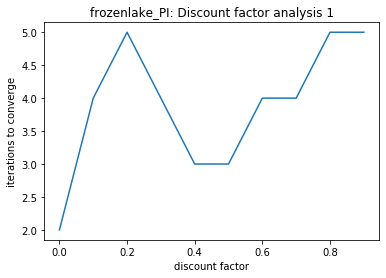

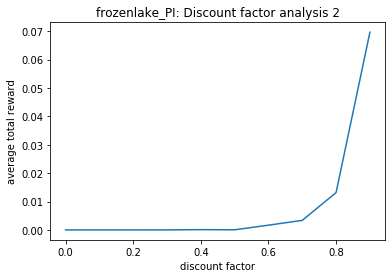

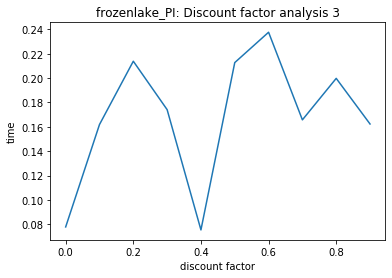

Policy-Iteration converged at step 3.
optimal policy [0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]
Time to converge 0.3743922710418701


In [9]:
param_range = np.arange(0, 1, 0.1)
iter_list = []
rewards_list = []
time_list = []

for i in param_range:
    t1 = time.time()
    optimal_policy, iter_to_converge = policy_iteration(env, gamma=i)
    rewards = evaluate_policy(env, optimal_policy, gamma=i)
    t2 = time.time()
    iter_list.append(iter_to_converge)
    rewards_list.append(rewards)
    time_list.append(t2-t1)

plot_graph(param_range, iter_list, 'discount factor', 'iterations to converge',
           'frozenlake_PI: Discount factor analysis 1')
plot_graph(param_range, rewards_list, 'discount factor', 'average total reward',
           'frozenlake_PI: Discount factor analysis 2')
plot_graph(param_range, time_list, 'discount factor', 'time',
           'frozenlake_PI: Discount factor analysis 3')
t1 = time.time()
optimal_policy, iter_to_converge = policy_iteration(env, gamma=0.99)
rewards = evaluate_policy(env, optimal_policy, gamma=0.99)

print('optimal policy', optimal_policy)
t2 = time.time()
temps=t2-t1
print('Time to converge',temps)

In [22]:
def plot_graph(data, xlabel, ylabel, title):

    plt.figure()
    plt.title(title)
    plt.plot(data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    return
def build_matrix(environment, n_states, n_actions):

    reward_matrix = np.zeros((n_states, n_actions))
    probability_matrix = np.zeros((n_actions, n_states, n_states))

    for state in range(n_states):

        for action in range(n_actions):

            for data_list in environment.env.P[state][action]:

                prob, next_state, reward, done = data_list
                reward_matrix[state, action] = reward
                probability_matrix[action, state, next_state] = prob

                probability_matrix[action, state, :] = probability_matrix[action, state, :] / \
                                                       np.sum(probability_matrix[action, state, :])

    return probability_matrix, reward_matrix

In [15]:
env = gym.make("FrozenLake-v0")
states = env.observation_space.n
actions = env.action_space.n
P, R = build_matrix(env, states, actions)
episode = 50000

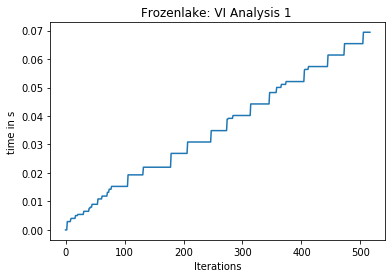

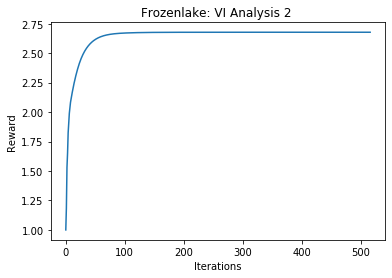

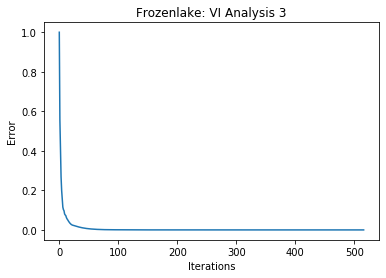

Temps: 0.06940937042236328
Iteration 517


In [16]:
VI = mdp.ValueIteration(P, R, 0.99, epsilon=1e-7)
VI_attributes = VI.run()
size = len(VI_attributes)
reward = []
time = []
error = []
for i in range(size):
    reward.append(VI_attributes[i]['Reward'])
    time.append(VI_attributes[i]['Time'])
    error.append(VI_attributes[i]['Error'])

plot_graph(time, 'Iterations', 'time in s', 'Frozenlake: VI Analysis 1 ' )
plot_graph(reward, 'Iterations', 'Reward', 'Frozenlake: VI Analysis 2 ' )
plot_graph(error, 'Iterations', 'Error', 'Frozenlake: VI Analysis 3')

print('Temps:',VI.time)
print('Iteration',VI.iter)
pol_VI=VI.policy


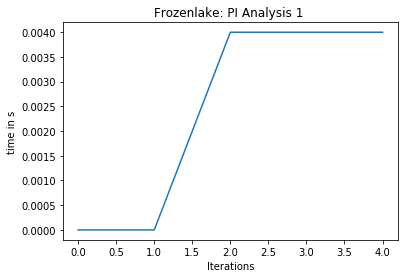

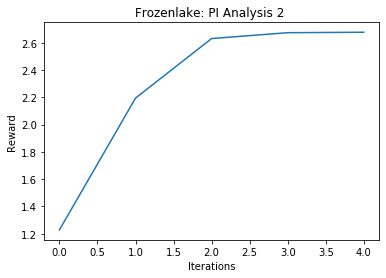

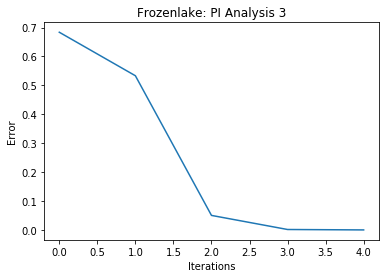

Temps: 0.0039997100830078125
Iteration 5


True

In [17]:
PI = mdp.PolicyIteration(P, R, 0.99)
PI_attributes = PI.run()

size = len(PI_attributes)
reward = []
time = []
error = []
for i in range(size):
    reward.append(PI_attributes[i]['Reward'])
    time.append(PI_attributes[i]['Time'])
    error.append(PI_attributes[i]['Error'])

plot_graph(time, 'Iterations', 'time in s', 'Frozenlake: PI Analysis 1 ' )
plot_graph(reward, 'Iterations', 'Reward', 'Frozenlake: PI Analysis 2 ' )
plot_graph(error, 'Iterations', 'Error', 'Frozenlake: PI Analysis 3')

print('Temps:',PI.time)
print('Iteration',PI.iter)
pol_PI=PI.policy
pol_PI==pol_VI

In [18]:
def plot(data, label, title):
    data_per_thousand_episodes = np.split(np.array(data),
                                             10000 / 1000)
    data_value = []
    counter = 1000
    for i in data_per_thousand_episodes:
        current_data_value = sum(i) / 1000
        data_value.append(current_data_value)
        counter = counter + 1000
    plt.title(title)
    plt.plot(data_value)
    plt.xlabel('number of iterations (in thousands)')
    plt.ylabel(label)
    plt.show()


### Qlearning

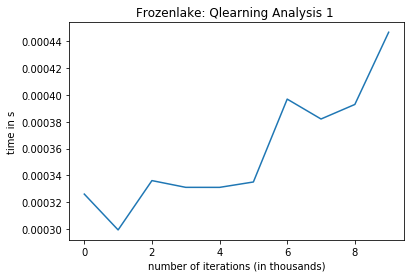

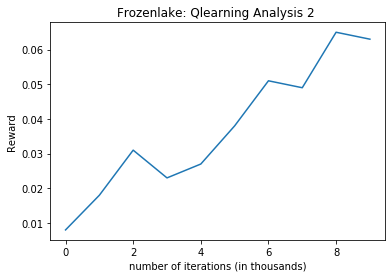

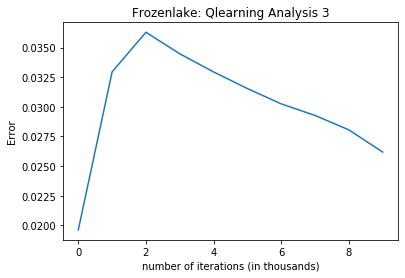

In [15]:
import time as time
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

Q_table = np.zeros((state_space_size, action_space_size))
num_of_episodes = 10000
max_steps_per_episode = 200
learning_rate = 0.5
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.1
exploration_decay_rate = 0.0001

rewards_of_all_episodes = []
time_of_all_episodes = []
error_of_all_episodes = []
q_table_of_all_episode = []

for episode in range(num_of_episodes):

    state = env.reset()
    count = 0
    done = False
    rewards_current_episode = 0
    t1 = time.time()
    error_current_episode = []

    for step in range(max_steps_per_episode):

        random_number = random.uniform(0, 1)

        if random_number > exploration_rate:
            action = np.argmax(Q_table[state, :])

        else:
            action = env.action_space.sample()

        new_state, reward, done, info = env.step(action)

        Q_table[state, action] = Q_table[state, action] * (1 - learning_rate) \
                                 + learning_rate * (reward + discount_rate * np.max(Q_table[new_state, :]))
        dQ = learning_rate * (reward + discount_rate * np.max(Q_table[new_state, :]) - Q_table[state, action])

        error_current_episode.append(np.absolute(dQ))

        state = new_state
        rewards_current_episode = rewards_current_episode + reward
        count += 1

        if done is True:
            break

        exploration_rate = min_exploration_rate + \
                       (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
    t2= time.time()
    q_table_of_all_episode.append(Q_table.argmax(axis=1))
    rewards_of_all_episodes.append(rewards_current_episode)
    time_of_all_episodes.append(t2-t1)
    error_of_all_episodes.append(np.mean(error_current_episode))

plot(time_of_all_episodes, 'time in s', 'Frozenlake: Qlearning Analysis 1 ' )
plot(rewards_of_all_episodes, 'Reward', 'Frozenlake: Qlearning Analysis 2 ' )
plot(error_of_all_episodes, 'Error', 'Frozenlake: Qlearning Analysis 3')


###https://github.com/ishanb97/Q-Learning-FrozenLake/blob/master/QLearningAlgorithmFrozenLake.ipynb/

In [19]:
def compute_ql_data(mdp_data):
    size = len(mdp_data)
    error = []
    for i in range(size):
        error.append(mdp_data[i]['Error'])
    data = []
    data_thousand = np.split(np.array(error), episode / 1000)
    c = 1000
    for i in data_thousand:
        current_data = sum(i) / 1000
        data.append(current_data)
        c += 1000
    return data

episode = 50000

ql_1 = mdp.QLearning(P, R, 0.99, alpha=0.1, epsilon=0.25, n_iter=episode)
ql_2 = mdp.QLearning(P, R, 0.99, alpha=0.1, epsilon=0.5, n_iter=episode)
ql_3 = mdp.QLearning(P, R, 0.99, alpha=0.1, epsilon=0.75, n_iter=episode)
ql_4 = mdp.QLearning(P, R, 0.99, alpha=0.1, epsilon=0.99, n_iter=episode)

ql_1_attributes = ql_1.run()
ql_2_attributes = ql_2.run()
ql_3_attributes = ql_3.run()
ql_4_attributes = ql_4.run()


data_1=compute_ql_data(ql_1_attributes)
data_2=compute_ql_data(ql_2_attributes)
data_3=compute_ql_data(ql_3_attributes)
data_4=compute_ql_data(ql_4_attributes)

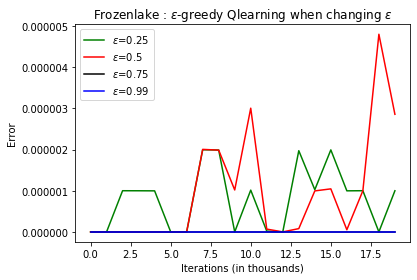

In [21]:
plt.title('Frozenlake : $\epsilon$-greedy Qlearning when changing $\epsilon$')
plt.plot(data_1[:20], label='$\epsilon$=0.25', color='green')
plt.plot(data_2[:20], label='$\epsilon$=0.5', color='red')
plt.plot(data_3[:20], label='$\epsilon$=0.75', color='black')
plt.plot(data_4[:20], label='$\epsilon$=0.99', color='blue')
plt.xlabel('Iterations (in thousands)')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

In [30]:
ql_1 = mdp.QLearning(P, R, 0.99, alpha=0.2, epsilon=0.99, n_iter=episode)
ql_2 = mdp.QLearning(P, R, 0.99, alpha=0.4, epsilon=0.99, n_iter=episode)
ql_3 = mdp.QLearning(P, R, 0.99, alpha=0.6, epsilon=0.99, n_iter=episode)
ql_4 = mdp.QLearning(P, R, 0.99, alpha=0.8, epsilon=0.99, n_iter=episode)

ql_1_attributes = ql_1.run()
ql_2_attributes = ql_2.run()
ql_3_attributes = ql_3.run()
ql_4_attributes = ql_4.run()


data_1=compute_ql_data(ql_1_attributes)
data_2=compute_ql_data(ql_2_attributes)
data_3=compute_ql_data(ql_3_attributes)
data_4=compute_ql_data(ql_4_attributes)


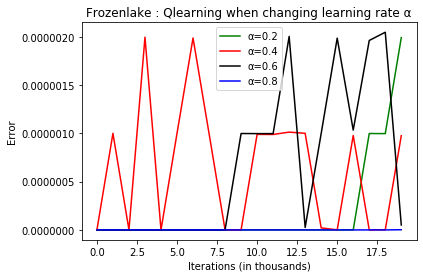

In [29]:
plt.title('Frozenlake : Qlearning when changing learning rate \u03B1')
plt.plot(data_1[:20], label='\u03B1=0.2', color='green')
plt.plot(data_2[:20], label='\u03B1=0.4', color='red')
plt.plot(data_3[:20], label='\u03B1=0.6', color='black')
plt.plot(data_4[:20], label='\u03B1=0.8', color='blue')
plt.xlabel('Iterations (in thousands)')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

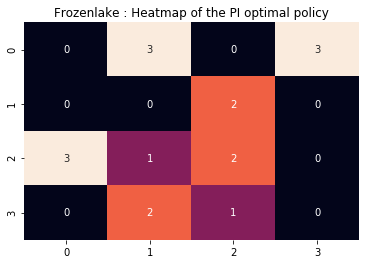

In [20]:
plt.figure()
plt.title('Frozenlake : Heatmap of the PI optimal policy')
sns.heatmap(np.array(PI.policy).reshape(4, 4), annot=True, cbar=False)
plt.show()

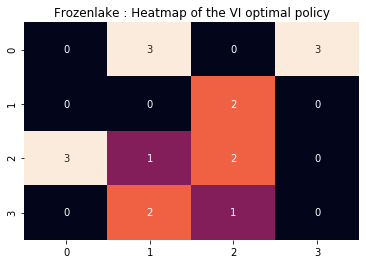

In [21]:
plt.figure()
plt.title('Frozenlake : Heatmap of the VI optimal policy')
sns.heatmap(np.array(VI.policy).reshape(4, 4), annot=True, cbar=False)
plt.show()

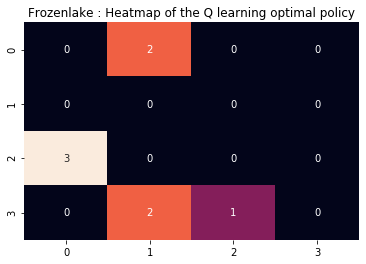

In [22]:
plt.figure()
plt.title('Frozenlake : Heatmap of the Q learning optimal policy')
sns.heatmap(np.array(ql_1.policy).reshape(4, 4), annot=True, cbar=False)
plt.show()

## 8x8

In [23]:
env = gym.make('FrozenLake8x8-v0').env


#### https://github.com/llSourcell/AI_for_video_games_demo/blob/master/value_iteration.py

###  Value Iteration

In [24]:
t1 = time.time()
optimal_v, iter_to_converge = value_iteration(env, gamma=0.99)
policy = extract_policy(optimal_v, gamma=0.99)
rewards = evaluate_policy(env, policy, gamma=0.99, n=100)
t2 = time.time()
temps=t2-t1
print('Time to converge',temps)
print('optimal policy', policy)


Value-iteration converged at iteration 1126.
Time to converge 1.0003151893615723
optimal policy [3. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 2. 2. 1. 3. 3. 0. 0. 2. 3. 2. 1.
 3. 3. 3. 1. 0. 0. 2. 2. 0. 3. 0. 0. 2. 1. 3. 2. 0. 0. 0. 1. 3. 0. 0. 2.
 0. 0. 1. 0. 0. 0. 0. 2. 0. 1. 0. 0. 1. 2. 1. 0.]


### Policy Iteration

In [25]:
t1 = time.time()
optimal_policy, iter_to_converge = policy_iteration(env, gamma=0.99)
rewards = evaluate_policy(env, optimal_policy, gamma=0.99)

print('optimal policy', optimal_policy)
t2 = time.time()
temps=t2-t1
print('Time to converge',temps)

Policy-Iteration converged at step 11.
optimal policy [3. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 2. 2. 1. 3. 3. 0. 0. 2. 3. 2. 1.
 3. 3. 3. 1. 0. 0. 2. 2. 0. 3. 0. 0. 2. 1. 3. 2. 0. 0. 0. 1. 3. 0. 0. 2.
 0. 0. 1. 0. 0. 0. 0. 2. 0. 1. 0. 0. 1. 2. 1. 0.]
Time to converge 1.9766428470611572


# Forest Management

### https://github.com/gkhayes/maze_reinforcement_learning/blob/master/mdp.py

In [26]:
import numpy as _np
import mdptoolbox
import mdptoolbox.example
from mdptoolbox.mdp import MDP
import math as _math
import time as _time
import mdptoolbox.util as _util
import seaborn as sns
# import hiive.mdptoolbox.mdp as mdp
# import hiive.mdptoolbox.example as example

In [27]:
P, R = mdptoolbox.example.forest(S=3000, r1=4, r2=1, p=0.6, is_sparse=False)
episode = 10000

In [28]:
def plot_graph(data, xlabel, ylabel, title):

    plt.figure()
    plt.title(title)
    plt.plot(data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    return


def _computeDimensions(transition):
    A = len(transition)
    try:
        if transition.ndim == 3:
            S = transition.shape[1]
        else:
            S = transition[0].shape[0]
    except AttributeError:
        S = transition[0].shape[0]
    return S, A

In [29]:
class QLearning(MDP):

    """A discounted MDP solved using the Q learning algorithm.
    Parameters
    ----------
    transitions : array
        Transition probability matrices. See the documentation for the ``MDP``
        class for details.
    reward : array
        Reward matrices or vectors. See the documentation for the ``MDP`` class
        for details.
    discount : float
        Discount factor. See the documentation for the ``MDP`` class for
        details.
    alpha : float
        Learning rate.
    epsilon : float
        Probability of selecting a random action.
    decay : float
        Epsilon decay rate.     
    n_iter : int, optional
        Number of iterations to execute. This is ignored unless it is an
        integer greater than the default value. Defaut: 10,000.
    skip_check : bool
        By default we run a check on the ``transitions`` and ``rewards``
        arguments to make sure they describe a valid MDP. You can set this
        argument to True in order to skip this check.
    Data Attributes
    ---------------
    Q : array
        learned Q matrix (SxA)
    V : tuple
        learned value function (S).
    policy : tuple
        learned optimal policy (S).
    mean_discrepancy : array
        Vector of V discrepancy mean over 100 iterations. Then the length of
        this vector for the default value of N is 100 (N/100).
    """

    def __init__(self, transitions, reward, discount, alpha, epsilon = 0.5, 
                 decay = 1.0, n_iter=10000, skip_check=False):
        # Initialise a Q-learning MDP.

        # The following check won't be done in MDP()'s initialisation, so let's
        # do it here
        self.max_iter = int(n_iter)
        #assert self.max_iter >= 10000, "'n_iter' should be greater than 10000."

        if not skip_check:
            # We don't want to send this to MDP because _computePR should not
            #  be run on it, so check that it defines an MDP
            _util.check(transitions, reward)

        # Store P, S, and A
        self.S, self.A = _computeDimensions(transitions)
        self.P = self._computeTransition(transitions)

        self.R = reward
        self.discount = discount
        
        self.alpha = alpha
        self.epsilon = epsilon
        self.decay = decay

        # Initialisations
        self.Q = _np.zeros((self.S, self.A))
        self.mean_discrepancy = []

    def run(self):
        # Run the Q-learning algoritm.
        discrepancy = []

        self.time = _time.time()

        # initial state choice
        s = _np.random.randint(0, self.S)

        for n in range(1, self.max_iter + 1):

            # Reinitialisation of trajectories every 100 transitions
            if (n % 100) == 0:
                s = _np.random.randint(0, self.S)

            # Action choice 
            pn = _np.random.random()
            if pn < (1 - self.epsilon):
                # optimal_action = self.Q[s, :].max()
                a = self.Q[s, :].argmax()
            else:
                a = _np.random.randint(0, self.A)
            
            self.epsilon *= self.decay
            
            # Simulating next state s_new and reward associated to <s,s_new,a>
            p_s_new = _np.random.random()
            p = 0
            s_new = -1
            while (p < p_s_new) and (s_new < (self.S - 1)):
                s_new = s_new + 1
                p = p + self.P[a][s, s_new]

            try:
                r = self.R[a][s, s_new]
            except IndexError:
                try:
                    r = self.R[s, a]
                except IndexError:
                    r = self.R[s]

            # Updating the value of Q
            # Decaying update coefficient (1/sqrt(n+2)) can be changed
            delta = r + self.discount * self.Q[s_new, :].max() - self.Q[s, a]

            dQ = self.alpha * delta
            self.Q[s, a] = self.Q[s, a] + dQ

            # current state is updated
            s = s_new
            
            # Computing and saving maximal values of the Q variation
            discrepancy.append(_np.absolute(dQ))

            # Computing means all over maximal Q variations values
            if len(discrepancy) == 1000:
                self.mean_discrepancy.append(_np.mean(discrepancy))
                discrepancy = []

            # compute the value function and the policy
            self.V = self.Q.max(axis=1)
            self.policy = self.Q.argmax(axis=1)
            
        self._endRun()

### 1.1 Value Iteration

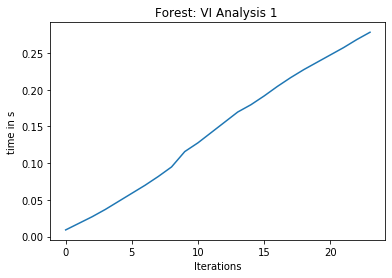

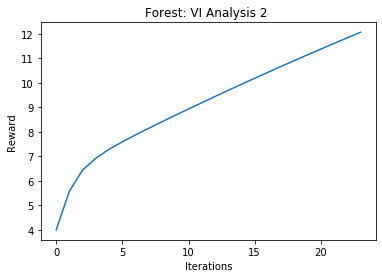

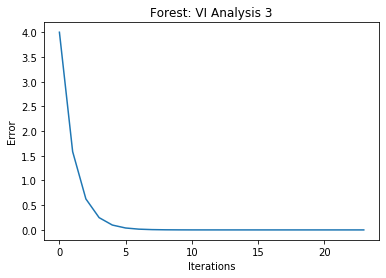

Temps: 0.2782576084136963
Iteration 24


In [30]:
VI = mdp.ValueIteration(P, R, 0.99, epsilon=1e-7)
VI_attributes = VI.run()
# # retrieved from https://seaborn.pydata.org/generated/seaborn.heatmap.html
# # plot_heatmap(np.array(pi.policy).reshape(50, 40), 'forest: policy iteration heatmap')

# VI_stats=VI_run()
size = len(VI_attributes)
reward = []
time = []
error = []
for i in range(size):
    reward.append(VI_attributes[i]['Reward'])
    time.append(VI_attributes[i]['Time'])
    error.append(VI_attributes[i]['Error'])

plot_graph(time, 'Iterations', 'time in s', 'Forest: VI Analysis 1 ' )
plot_graph(reward, 'Iterations', 'Reward', 'Forest: VI Analysis 2 ' )
plot_graph(error, 'Iterations', 'Error', 'Forest: VI Analysis 3')


# PI = mdp.PolicyIteration(P, R, 0.9)
print('Temps:',VI.time)
print('Iteration',VI.iter)
pol_VI=VI.policy


### 1.2 Policy Iteration

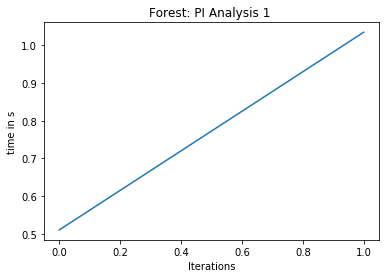

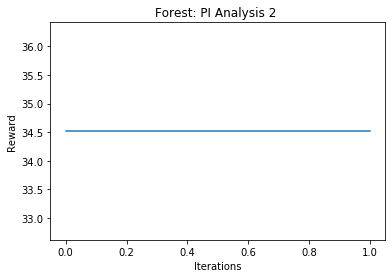

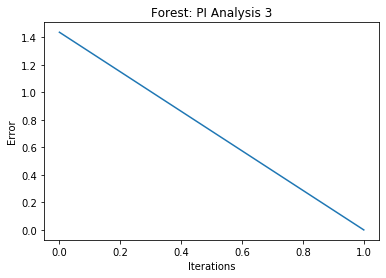

Temps: 1.0360612869262695
Iteration 2


True

In [31]:
PI = mdp.PolicyIteration(P, R, 0.99)
PI_attributes = PI.run()

size = len(PI_attributes)
reward = []
time = []
error = []
for i in range(size):
    reward.append(PI_attributes[i]['Reward'])
    time.append(PI_attributes[i]['Time'])
    error.append(PI_attributes[i]['Error'])

plot_graph(time, 'Iterations', 'time in s', 'Forest: PI Analysis 1 ' )
plot_graph(reward, 'Iterations', 'Reward', 'Forest: PI Analysis 2 ' )
plot_graph(error, 'Iterations', 'Error', 'Forest: PI Analysis 3')

print('Temps:',PI.time)
print('Iteration',PI.iter)
pol_PI=PI.policy
pol_PI==pol_VI

In [32]:
P1, R1 = mdptoolbox.example.forest(S=9000, r1=4, r2=1, p=0.6, is_sparse=False)
episode = 10000
PI = mdp.PolicyIteration(P1, R1, 0.99)
PI_attributes = PI.run()
print('Temps:',PI.time)
print('Iteration',PI.iter)
pol_PI=PI.policy

VI = mdp.ValueIteration(P1, R1, 0.99, epsilon=1e-7)
VI_attributes = VI.run()

print('Temps:',VI.time)
print('Iteration',VI.iter)
pol_VI=VI.policy

pol_PI==pol_VI

Temps: 19.477456092834473
Iteration 2
Temps: 2.1482601165771484
Iteration 24


True

In [33]:
P1, R1 = mdptoolbox.example.forest(S=5, r1=4, r2=1, p=0.6, is_sparse=False)
episode = 10000
PI = mdp.PolicyIteration(P1, R1, 0.99)
PI_attributes = PI.run()
print('Temps:',PI.time)
print('Iteration',PI.iter)
pol_PI=PI.policy

VI = mdp.ValueIteration(P1, R1, 0.99, epsilon=1e-7)
VI_attributes = VI.run()

print('Temps:',VI.time)
print('Iteration',VI.iter)
pol_VI=VI.policy

pol_PI==pol_VI

Temps: 0.008971929550170898
Iteration 2
Temps: 0.0019919872283935547
Iteration 24


True

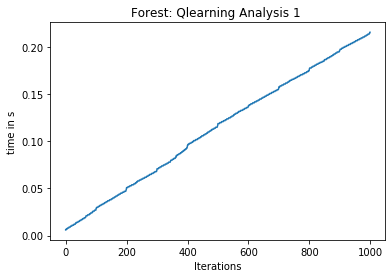

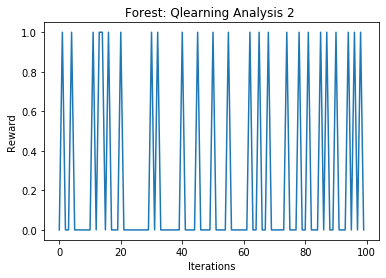

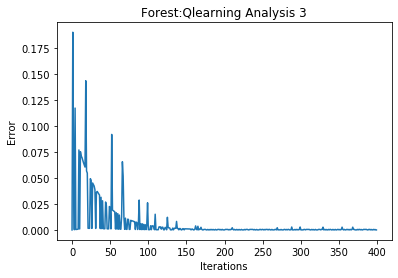

P: 
array([[0.6, 0.4, 0. , ..., 0. , 0. , 0. ],
       [0.6, 0. , 0.4, ..., 0. , 0. , 0. ],
       [0.6, 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0.6, 0. , 0. , ..., 0. , 0.4, 0. ],
       [0.6, 0. , 0. , ..., 0. , 0. , 0.4],
       [0.6, 0. , 0. , ..., 0. , 0. , 0.4]])
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

R: 
array([0., 0.])
array([0., 1.])



In [34]:
episode=30000
ql_1 = mdp.QLearning(P, R, 0.99, alpha=0.2, epsilon=0.2, n_iter=episode)
ql_1_attributes=ql_1.run()
size = len(ql_1_attributes)
reward = []
time = []
error = []
for i in range(1000):
    reward.append(ql_1_attributes[i]['Reward'])
    time.append(ql_1_attributes[i]['Time'])
    error.append(ql_1_attributes[i]['Error'])

plot_graph(time, 'Iterations', 'time in s', 'Forest: Qlearning Analysis 1 ' )
plot_graph(reward[:100], 'Iterations', 'Reward', 'Forest: Qlearning Analysis 2 ' )
plot_graph(error[:400], 'Iterations', 'Error', 'Forest:Qlearning Analysis 3')

print(ql_1)


#### https://github.com/ishanb97/Q-Learning-FrozenLake/blob/master/QLearningAlgorithmFrozenLake.ipynb/

In [35]:
def compute_ql_data(mdp_data):
    size = len(mdp_data)
    error = []
    for i in range(size):
        error.append(mdp_data[i]['Error'])
    data = []
    data_thousand = np.split(np.array(error), episode / 1000)
    c = 1000
    for i in data_thousand:
        current_data = sum(i) / 1000
        data.append(current_data)
        c += 1000
    return data

episode = 50000

ql_1 = mdp.QLearning(P, R, 0.99, alpha=0.1, epsilon=0.25, n_iter=episode)
ql_2 = mdp.QLearning(P, R, 0.99, alpha=0.1, epsilon=0.5, n_iter=episode)
ql_3 = mdp.QLearning(P, R, 0.99, alpha=0.1, epsilon=0.75, n_iter=episode)
ql_4 = mdp.QLearning(P, R, 0.9, alpha=0.2, epsilon=0.99, n_iter=episode)

ql_1_attributes = ql_1.run()
ql_2_attributes = ql_2.run()
ql_3_attributes = ql_3.run()
ql_4_attributes = ql_4.run()


data_1=compute_ql_data(ql_1_attributes)
data_2=compute_ql_data(ql_2_attributes)
data_3=compute_ql_data(ql_3_attributes)
data_4=compute_ql_data(ql_4_attributes)



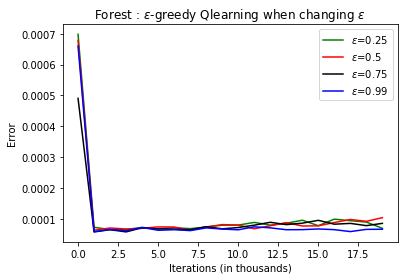

In [36]:
plt.title('Forest : $\epsilon$-greedy Qlearning when changing $\epsilon$')
plt.plot(data_1[:20], label='$\epsilon$=0.25', color='green')
plt.plot(data_2[:20], label='$\epsilon$=0.5', color='red')
plt.plot(data_3[:20], label='$\epsilon$=0.75', color='black')
plt.plot(data_4[:20], label='$\epsilon$=0.99', color='blue')
plt.xlabel('Iterations (in thousands)')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

In [37]:
def compute_ql_data(mdp_data):
    size = len(mdp_data)
    error = []
    for i in range(size):
        error.append(mdp_data[i]['Error'])
    data = []
    data_thousand = np.split(np.array(error), episode / 1000)
    c = 1000
    for i in data_thousand:
        current_data = sum(i) / 1000
        data.append(current_data)
        c += 1000
    return data

episode = 50000

ql_1 = mdp.QLearning(P, R, 0.99, alpha=0.2, epsilon=0.99, n_iter=episode)
ql_2 = mdp.QLearning(P, R, 0.99, alpha=0.4, epsilon=0.99, n_iter=episode)
ql_3 = mdp.QLearning(P, R, 0.99, alpha=0.6, epsilon=0.99, n_iter=episode)
ql_4 = mdp.QLearning(P, R, 0.9, alpha=0.8, epsilon=0.99, n_iter=episode)

ql_1_attributes = ql_1.run()
ql_2_attributes = ql_2.run()
ql_3_attributes = ql_3.run()
ql_4_attributes = ql_4.run()


data_1=compute_ql_data(ql_1_attributes)
data_2=compute_ql_data(ql_2_attributes)
data_3=compute_ql_data(ql_3_attributes)
data_4=compute_ql_data(ql_4_attributes)


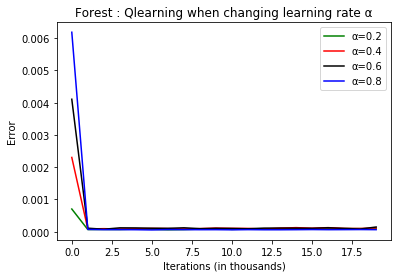

In [38]:
plt.title('Forest : Qlearning when changing learning rate \u03B1')
plt.plot(data_1[:20], label='\u03B1=0.2', color='green')
plt.plot(data_2[:20], label='\u03B1=0.4', color='red')
plt.plot(data_3[:20], label='\u03B1=0.6', color='black')
plt.plot(data_4[:20], label='\u03B1=0.8', color='blue')
plt.xlabel('Iterations (in thousands)')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

In [39]:
import numpy as np 
import pandas as pd
import mdptoolbox
import numpy as np
import mdptoolbox.example
# import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def samplefrom(distribution):
    return (np.random.choice(len(distribution), 1, p=distribution))[0]

def playtransition(mdp, state, action):
        nextstate = samplefrom(mdp.P[action][state])
        return nextstate, mdp.R[action][state]

def epsilon_greedy_exploration(Q, epsilon, num_actions):
    def policy_exp(state):
        probs = np.ones(num_actions, dtype=float) * epsilon / num_actions
        best_action = np.argmax(Q[state])
        probs[best_action] += (1.0 - epsilon)
        return probs
    return policy_exp

def q_learning(mdp, num_episodes, T_max, epsilon=0.1):
    Q = np.zeros((mdp.S, mdp.A))
    episode_rewards = np.zeros(num_episodes)
    policy = np.ones(mdp.S)
    V = np.zeros((num_episodes, mdp.S))
    for i_episode in range(num_episodes): 
        greedy_probs = epsilon_greedy_exploration(Q, epsilon, mdp.A)
        N = np.zeros((mdp.S, mdp.A))
        state = 0
        for t in range(T_max):
            # epsilon greedy exploration
            action_probs = greedy_probs(state)
            action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
            next_state, reward = playtransition(mdp, state, action)
            episode_rewards[i_episode] += reward
            N[state, action] += 1
            alpha = 1/(t+1)**0.85
            best_next_action = np.argmax(Q[next_state])    
            td_target = reward + mdp.discount * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
            state = next_state
        V[i_episode,:] = Q.max(axis=1)
        policy = Q.argmax(axis=1)
        
    plot_summary(V, policy, episode_rewards, num_episodes)
    return V, policy, episode_rewards, N,num_episodes

def plot_summary(V, policy, episode_rewards, num_episodes):
    print("Optimal policy is:\n", policy, "\nIts value is:\n", V[-1])
    rewards_smoothed = pd.Series(episode_rewards).rolling(int(num_episodes/10), min_periods=int(num_episodes/10)).mean()
    plt.plot(rewards_smoothed, c='red')
    plt.title("Reward cumulated over episodes smoothed over window size {}".format(int(num_episodes/10))) 
    plt.show()

def UCB_exploration(Q, num_actions, alpha=1):
    def UCB_exp(state, N, t):
        A = np.zeros(num_actions)
        Q_ = Q[state,:]/max(Q[state,:]) + np.sqrt(alpha*np.log(t+1)/(2*N[state]))
        best_action = Q_.argmax()
        A[best_action] = 1
        return A
    return UCB_exp

def try_all_states_actions(mdp, N, Q):
    for state in range(mdp.S):
            for action in range(mdp.A):
                next_state, reward = playtransition(mdp, state, action)
                N[state, action] += 1
                best_next_action = np.argmax(Q[next_state])    
                td_target = reward + mdp.discount * Q[next_state][best_next_action]
                td_delta = td_target - Q[state][action]
                Q[state][action] += 1 * td_delta
    return Q, N
    
def q_learning_ucb(mdp, num_episodes, T_max, epsilon=0.1):
    Q = np.zeros((mdp.S, mdp.A))
    episode_rewards = np.zeros(num_episodes)
    policy = np.ones(mdp.S)
    V = np.zeros((num_episodes, mdp.S))
    N = np.zeros((mdp.S, mdp.A))
    Q, N = try_all_states_actions(mdp, N, Q)
    for i_episode in range(num_episodes): 
        # UCB exploration
        UCB_exp = UCB_exploration(Q, mdp.A)
        state = np.random.choice(np.arange(mdp.S))
        for t in range(T_max):
            # UCB exploration
            action_probs = UCB_exp(state, N, t+(T_max*i_episode))
            action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
            next_state, reward = playtransition(mdp, state, action)
            episode_rewards[i_episode] += reward
            N[state, action] += 1
            alpha = 1/(t+1)**0.8
            best_next_action = np.argmax(Q[next_state])    
            td_target = reward + mdp.discount * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
            state = next_state
        V[i_episode,:] = Q.max(axis=1)
        policy = Q.argmax(axis=1)
        
    plot_summary(V, policy, episode_rewards, num_episodes)
    return V, policy, episode_rewards, N,num_episodes
def optimal_value_iteration(mdp, V0, num_iterations, epsilon=0.0001):
    V = np.zeros((num_iterations+1, mdp.S))
    V[0][:] = np.ones(mdp.S)*V0
    X = np.zeros((num_iterations+1, mdp.A, mdp.S))
    star = np.zeros((num_iterations+1,mdp.S))
    for k in range(num_iterations):
        for s in range(mdp.S):
            for a in range(mdp.A):
                X[k+1][a][s] = mdp.R[a][s] + mdp.discount*np.sum(mdp.P[a][s].dot(V[k]))
            star[k+1][s] = (np.argmax(X[k+1,:,s]))
            V[k+1][s] = np.max(X[k+1,:,s])
        
        if (np.max(V[k+1][:]-V[k][:])-np.min(V[k+1][:]-V[k][:]))<epsilon:
            V[k+1:][:]= V[k+1][:]
            star[k+1:][:]= star[k+1][:]
            X[k+1:][:][:]= X[k+1,:,:]
            break
        else: pass
    print("The optimal policy is:\n", star[-1], "\nIts value is:\n", V[-1])
    plt.plot(np.max(V,axis=1))
    plt.title("Evolution of ‖ V ‖∞ over iterations")
    plt.show()
    return star, V, X

In [40]:
P, R = mdptoolbox.example.forest(S=3000, r1=4, r2=1, p=0.6, is_sparse=False)
mdp = mdptoolbox.mdp.MDP(P, R, 0.99, 0.0001, 10000)

In [ ]:
V , policy, episode_rewards, N,num_episodes = q_learning(mdp, 3000,100, epsilon=0.2)
V , policy, episode_rewards_ucb, N,num_episodes_ucb = q_learning_ucb(mdp, 3000,100)

rewards_smoothed = pd.Series(episode_rewards).rolling(int(num_episodes/10), min_periods=int(num_episodes/10)).mean()
rewards_smoothed_ucb = pd.Series(episode_rewards_ucb).rolling(int(num_episodes_ucb/10), min_periods=int(num_episodes_ucb/10)).mean()
# plt.plot(rewards_smoothed_ucb, c='red')

In [ ]:
plt.plot(rewards_smoothed_ucb, 'r', rewards_smoothed, 'g')
plt.xlabel('Iterations')
plt.ylabel('Cumulated reward')
plt.legend(['UCB exploration', '$\epsilon$-greedy exploration'])
plt.title(' UCB exploration vs $\epsilon$-greedy exploration')
plt.show()

#### https://medium.com/@m.alzantot/deep-reinforcement-learning-demysitifed-episode-2-policy-iteration-value-iteration-and-q-978f9e89ddaa


#### https://towardsdatascience.com/reinforcement-learning-from-scratch-simple-application-and-evaluating-parameters-in-detail-2dcee3de008c

#### https://medium.com/sequential-learning/optimistic-q-learning-b9304d079e11


#### https://gist.github.com/tonellotto/2fa1eec1a3065e2a11672328fb2f8e4a

#### https://gist.github.com/tonellotto/1965300e96ae7f539717b51abcbcb1a6

#### https://github.com/YassineYousfi/Sequential-Learning


#### https://github.com/gkhayes/maze_reinforcement_learning/blob/master/mdp.py


#### https://github.com/IsaacPatole/Mountaincar-v0-using-Q-learning/blob/master/Qlearning_for_Mountaincar.py